<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Application Programming Interface, Natural Language Processing, & Classification Modelling

### Contents:
#### Part 2 (of 3)
- Executive Summary
- Problem Statement
- Background & Research
- Data Collection
- [Data Wrangling](#Data-Wrangling)
- [Exploration & Visualisation](#Exploration-&-Visualisation)
- Pre-Processing & Modelling
- Results & Analysis
- Recommendations & Conclusions
- References

## Data Wrangling

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

pd.set_option('display.max.columns', None)
pd.set_option('display.max.colwidth', 100)

### Data Sources

The following data sources were used:

* [`btc_posts.csv`](../data/btc_posts.csv): Bitcoin Subreddit Posts Dataset

> This dataset contains the attributes of the 5000 most recent posts (as of 22 July 2021) from the bitcoin subreddit [here](https://www.reddit.com/r/Bitcoin/).

* [`eth_posts.csv`](../data/eth_posts.csv): Ethereum Subreddit Posts Dataset

> This dataset contains the attributes of the 10000 most recent posts (as of 22 July 2021) from the ethereum subreddit [here](https://www.reddit.com/r/ethereum/).

### Data Importing

#### Import Bitcoin Posts Data

In [2]:
# import csv file as dataframe
p_btc_df = pd.read_csv('../data/btc_posts.csv')

In [3]:
# check out first row
p_btc_df.head(1)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,removed_by_category,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,post_hint,preview,thumbnail_height,thumbnail_width,url_overridden_by_dest,media,media_embed,secure_media,secure_media_embed,distinguished,suggested_sort,link_flair_text,gallery_data,is_gallery,media_metadata,author_flair_background_color,banned_by,author_cakeday,crosspost_parent,crosspost_parent_list,link_flair_template_id
0,[],False,theremnanthodl,noob,"[{'e': 'text', 't': 'redditor for a day'}]",2ec8e69e-6c36-11e9-a04b-0afb553d4ea6,redditor for a day,dark,richtext,t2_dg8srid3,False,False,False,[],False,False,1626939006,self.Bitcoin,https://www.reddit.com/r/Bitcoin/comments/op915k/bitcoin_town_a_fiction_novel_about_using_bitcoin/,{},op915k,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Bitcoin/comments/op915k/bitcoin_town_a_fiction_novel_about_using_bitcoin/,False,6,reddit,1626939018,1,[removed],True,False,False,Bitcoin,t5_2s3qj,3206851,public,self,Bitcoin Town - A fiction novel about using Bitcoin against the Great Reset,0,[],1.0,https://www.reddit.com/r/Bitcoin/comments/op915k/bitcoin_town_a_fiction_novel_about_using_bitcoin/,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Import Ethereum Posts Data

In [4]:
# import csv file as dataframe
p_eth_df = pd.read_csv('../data/eth_posts.csv')

/Users/raytan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18,59,81) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# check out first row
p_eth_df.head(1)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,author_is_blocked,removed_by_category,thumbnail_height,thumbnail_width,media,media_embed,post_hint,preview,secure_media,secure_media_embed,url_overridden_by_dest,crosspost_parent,crosspost_parent_list,author_flair_background_color,author_flair_text_color,banned_by,author_cakeday,is_gallery,gallery_data,media_metadata,poll_data,event_end,event_is_live,event_start,edited,gilded
0,[],False,wuzzgucci,NaN,[],NaN,text,t2_53ftzlxj,False,False,[],False,False,1626938727,self.ethereum,https://www.reddit.com/r/ethereum/comments/op8z9u/should_i_sell_bitcoin_and_just_go_all_in_ether...,{},op8z9u,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,False,44,0,False,all_ads,/r/ethereum/comments/op8z9u/should_i_sell_bitcoin_and_just_go_all_in_ethereum/,False,6,1626938737,1,"* I have like $37.5k invested total in bitcoin, and after the crash, I only have $10.8k gains. I...",True,False,False,ethereum,t5_2zf9m,1044237,public,top,self,Should I sell bitcoin and just go all in ethereum?,0,[],1.0,https://www.reddit.com/r/ethereum/comments/op8z9u/should_i_sell_bitcoin_and_just_go_all_in_ether...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

#### Define A General Purpose Cleaning Function

In [6]:
# cleaning function
def cleaner(text):
    
    # Make lowercase
    text = text.lower()

    # Remove html special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', ' ', text)
    
    # Remove url hyperlinks
    text = re.sub(r'http\S+|www.\S+', ' ', text)
    
    # Remove whitespace characters (except space)
    text = re.sub(r'[\r\t\v\n\f]+', ' ', text)
    
    # Remove words with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', ' ', text)
    
    # Remove single words enclosed in square brackets (e.g. [removed], [deleted], [picture])
    text = re.sub(r'\[\w+\]', ' ', text)
    
    # Remove zero-width space
    text = re.sub(r'x200b', ' ', text)
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode
    text = ''.join(char for char in text if char <= '\uFFFF') 
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    return text

In [7]:
# # remove url hyperlinks in the text
# df['post'].replace(r'http\S+|www.\S+', ' ', regex=True, inplace=True)

# # check if there are url hyperlinks in the text
# df[df['post'].str.contains(r'http\S+|www.\S+')]

# # remove url hyperlinks in the text
# df['post'].replace(r'http\S+|www.\S+', ' ', regex=True, inplace=True)

# # check if there are url hyperlinks in the text
# df[df['post'].str.contains(r'http\S+|www.\S+')]

#### Clean Bitcoin Posts Data

In [8]:
# check out columns
p_btc_df.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_is_blocked', 'author_patreon_flair', 'author_premium',
       'awarders', 'can_mod_post', 'contest_mode', 'created_utc', 'domain',
       'full_link', 'gildings', 'id', 'is_created_from_ads_ui',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'removed_by_category', 'retrieved_on', 'score', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id'

In [9]:
# copy feature/target columns of interest
p_btc = p_btc_df[['subreddit', 'title', 'selftext']].copy()

In [10]:
# rename columns
p_btc.columns = ['subreddit', 'post_title', 'post_content']

In [11]:
# check out shape
p_btc.shape

(5000, 3)

In [12]:
# check out first 5 rows
p_btc.head()

,subreddit,post_title,post_content
0,Bitcoin,Bitcoin Town - A fiction novel about using Bitcoin against the Great Reset,[removed]
1,Bitcoin,Bitcoin Town - A fiction novel about using Bitcoin against the Great Reset,[removed]
2,Bitcoin,"Crypto Influencers Dorsey, Woods, and Musk Face-off During B-Word Conference",NaN
3,Bitcoin,Elon Musk’s View on Bitcoin (July 21 2021),NaN
4,Bitcoin,"You’ve undoubtedly heard about crypto currencies by now such as Bitcoin, Ethereum and DOGE coin....",NaN


In [13]:
# check out data types of columns
p_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     5000 non-null   object
 1   post_title    5000 non-null   object
 2   post_content  2506 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [14]:
# check for null values
p_btc.isnull().sum().to_frame().T

,subreddit,post_title,post_content
0,0,0,2494


In [15]:
# drop all rows with null values
p_btc.dropna(inplace=True)
p_btc.reset_index(drop=True, inplace=True)
print(p_btc.shape)

(2506, 3)


In [16]:
# create a new column that combines post title and post content to check for duplicate posts
p_btc['title_content'] = p_btc['post_title'] + p_btc['post_content']

# check for duplicates in title_content column by showing all values with >1 occurrence
p_btc['title_content'].value_counts()[p_btc['title_content'].value_counts() > 1].to_frame()

,title_content
Bitcoin and other top blockchains is Libonomy.[removed],10
Bitcoin and other top blockchains is Libonomy[removed],10
"Ethereum, Bitcoin and other top blockchains is Libonomy.[removed]",6
Tokenpad NetworkThis is the best project. I would like to talk about one of the best project. A very promising project. this project will be able to go much further. I hope this project is will be success,4
Bitcoin investment[removed],4
...,...
BTC CLOUD MINING[removed],2
Bitcoin Town - A fiction novel about using Bitcoin against the Great Reset[removed],2
Libonomy is the most technologically advanced blockchain today[removed],2
Marketing a new cryptocurrency tokenWhat is the marketing strategy for a cryptocurrency token? I have create a few tokens and have been trying to market them. With thousands of rugpulls everyday it is really hard. Also you can not use traditional ads etc. What do you guys suggest?,2


In [17]:
# drop rows which have identical title and content except for the first occurrence
p_btc.drop_duplicates(subset='title_content', ignore_index=True, inplace=True)
print(p_btc.shape)

(2363, 4)


In [18]:
# drop title_content column which is now unneeded
p_btc.drop(columns='title_content', inplace=True)

In [19]:
# clean post title and post content
p_btc['post_title'] = p_btc['post_title'].apply(cleaner)
p_btc['post_content'] = p_btc['post_content'].apply(cleaner)

In [20]:
# check if there are blank values in the text of post_title column
p_btc[p_btc['post_title'].str.contains(r'^\s+$')]

,subreddit,post_title,post_content
127,Bitcoin,,
365,Bitcoin,,
1251,Bitcoin,,got bad feeling here
1339,Bitcoin,,
1698,Bitcoin,,what the difference owning bitcoin robinhood coinbase
1781,Bitcoin,,
1788,Bitcoin,,the absolute fud coming out shawn tully’ uninformed journalistic face insane read what ...
2208,Bitcoin,,your own bank


In [21]:
# drop all rows with blank values in the text of post_title column
p_btc.drop(index=p_btc[p_btc['post_title'].str.contains(r'^\s+$')].index, inplace=True)
p_btc.reset_index(drop=True, inplace=True)
print(p_btc.shape)

(2355, 3)


In [22]:
# check if there are blank values in the text of post_content column
p_btc[p_btc['post_content'].str.contains(r'^\s+$')]

,subreddit,post_title,post_content
0,Bitcoin,bitcoin town fiction novel about using bitcoin against the great reset,
2,Bitcoin,only morons post about elon musk spacex tesla,
7,Bitcoin,will eth2 affect bitcoinbitcoin mining,
8,Bitcoin,create your token easy steps with supertoken,
12,Bitcoin,anyone else dabbling the micro bitcoin futures,
...,...,...,...
2346,Bitcoin,phone hacking,
2348,Bitcoin,libonomy’ engine runs autonomously makes decisions ensure network’ evolution,
2349,Bitcoin,bitcoin cleveland group,
2351,Bitcoin,what surprise just receive 9btc into wallet immediately sent 3btc thanks,


In [23]:
# drop all rows with blank values in the text of post_content column
p_btc.drop(index=p_btc[p_btc['post_content'].str.contains(r'^\s+$')].index, inplace=True)
p_btc.reset_index(drop=True, inplace=True)
print(p_btc.shape)

(1557, 3)


In [24]:
# check if there are empty strings in the text of post_title column
p_btc[p_btc['post_title'] == '']

,subreddit,post_title,post_content


In [25]:
# check if there are empty strings in the text of post_content column
p_btc[p_btc['post_content'] == '']

,subreddit,post_title,post_content


#### Clean Ethereum Posts Data

In [26]:
# check out columns
p_eth_df.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'media_only', 'no_follow', 'num_comments', 'num_crossposts',
       'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
       'subreddit_type', 'suggested_sort', 'thumbnail', 'title',
       'total_awards_

In [27]:
# copy feature/target columns of interest
p_eth = p_eth_df[['subreddit', 'title', 'selftext']].copy()

In [28]:
# rename columns
p_eth.columns = ['subreddit', 'post_title', 'post_content']

In [29]:
# check out shape
p_eth.shape

(10000, 3)

In [30]:
# check out first 5 rows
p_eth.head()

,subreddit,post_title,post_content
0,ethereum,Should I sell bitcoin and just go all in ethereum?,"* I have like $37.5k invested total in bitcoin, and after the crash, I only have $10.8k gains. I..."
1,ethereum,The hug – ultra rare 1/1,[removed]
2,ethereum,L2BEAT website upgrade,[removed]
3,ethereum,The Internet World of our Future!!! (INSANE) the best vid I’ve ever watched in my life of crypto,NaN
4,ethereum,I like the way Polygon thinks - Mihailo Bjelic on Twitter,NaN


In [31]:
# check out data types of columns
p_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     10000 non-null  object
 1   post_title    10000 non-null  object
 2   post_content  5453 non-null   object
dtypes: object(3)
memory usage: 234.5+ KB


In [32]:
# check for null values
p_eth.isnull().sum().to_frame().T

,subreddit,post_title,post_content
0,0,0,4547


In [33]:
# drop all rows with null values
p_eth.dropna(inplace=True)
p_eth.reset_index(drop=True, inplace=True)
print(p_eth.shape)

(5453, 3)


In [34]:
# create a new column that combines post title and post content to check for duplicate posts
p_eth['title_content'] = p_eth['post_title'] + p_eth['post_content']

# check for duplicates in title content by showing all values with >1 occurrence
p_eth['title_content'].value_counts()[p_eth['title_content'].value_counts() > 1].to_frame()

,title_content
"Titan Pharmaceuticals looks like a pretty good setup, it could very well run $TTNP 💎🙌🏻[deleted]",53
Libonomy Blockchain[removed],21
digitalbureaucracy[removed],20
"Daily Discussion Thread**Welcome to the Daily Discussion. Please read the disclaimer, guidelines, and rules before participating.**\n\nDisclaimer:\n\nThough karma rules still apply, moderation is less active on this thread than on the rest of the sub. Therefore, consider all information posted here with several liberal heaps of salt, and always cross check any information you may read on this thread with known sources.\n\n## Rules:\n\n* All [sub rules](https://www.reddit.com/r/Ethereum/about/rules/) apply in this thread.\n* Discussion topics must be related to Ethereum.\n* Behave with civility and politeness. Do not use offensive, racist or homophobic language.\n* Comments will be sorted by newest first.\n\nUseful Links:\n\n* [Ethereum.org](https://ethereum.org)\n* [ETHHub](https://ethhub.io/)\n* [ETHMerge.com](https://ethmerge.com/)\n\n**Reminder**\n\n/r/ethereum is a community for discussing the technology, news, applications and community of Ethereum. Discussion of the Ether price or trading is not allowed. Please keep those discussions to [/r/ethfinance](https://www.reddit.com/r/ethfinance) and [/r/ethstaker](https://www.reddit.com/r/ethstaker).",19
"Daily Discussion Thread**Welcome to the Daily Discussion. Please read the disclaimer, guidelines, and rules before participating.**\n\nDisclaimer:\n\nThough karma rules still apply, moderation is less active on this thread than on the rest of the sub. Therefore, consider all information posted here with several liberal heaps of salt, and always cross check any information you may read on this thread with known sources.\n\n## Rules:\n\n* All [sub rules](https://www.reddit.com/r/Ethereum/about/rules/) apply in this thread.\n* Discussion topics must be related to Ethereum.\n* Behave with civility and politeness. Do not use offensive, racist or homophobic language.\n* Comments will be sorted by newest first.\n\nUseful Links:\n\n* [Ethereum.org](https://ethereum.org)\n* [ETHHub](https://ethhub.io/)\n* [ETHMerge.com](https://ethmerge.com/)",15
...,...
Why the Rich and Educated Always Stacks Ethereum (ETH) and Ripple (XRP)[deleted],2
How to stack?[removed],2
How Can I View How Much Ether is currently staked or used in Dapps?[removed],2
Ethereum fees have skyrocketed.[removed],2


In [35]:
# drop rows which have identical title and content except for the first occurrence
p_eth.drop_duplicates(subset='title_content', ignore_index=True, inplace=True)
print(p_eth.shape)

(5063, 4)


In [36]:
# drop title_content column which is now unneeded
p_eth.drop(columns='title_content', inplace=True)

In [37]:
# clean post title and post content
p_eth['post_title'] = p_eth['post_title'].apply(cleaner)
p_eth['post_content'] = p_eth['post_content'].apply(cleaner)

In [38]:
# check if there are blank values in the text of post_title column
p_eth[p_eth['post_title'].str.contains(r'^\s+$')]

,subreddit,post_title,post_content
7,ethereum,,
30,ethereum,,
196,ethereum,,
668,ethereum,,
698,ethereum,,
994,ethereum,,
1167,ethereum,,
1445,ethereum,,
1553,ethereum,,what the plan for tomorrow for ether newbie here gentle
1675,ethereum,,


In [39]:
# drop all rows with blank values in the text of post_title column
p_eth.drop(index=p_eth[p_eth['post_title'].str.contains(r'^\s+$')].index, inplace=True)
p_eth.reset_index(drop=True, inplace=True)
print(p_eth.shape)

(5046, 3)


In [40]:
# check if there are blank values in the text of post_content column
p_eth[p_eth['post_content'].str.contains(r'^\s+$')]

,subreddit,post_title,post_content
1,ethereum,the hug – ultra rare,
2,ethereum,l2beat website upgrade,
3,ethereum,possible specify which block height transaction get included,
4,ethereum,create your token easy steps with supertoken,
5,ethereum,ethereum,
...,...,...,...
5036,ethereum,selling openseanfteth ens domain name,
5040,ethereum,question the economics gas,
5042,ethereum,what’ the best way save gas fees erc20 tokens any,
5043,ethereum,high payout airdrop,


In [41]:
# drop all rows with blank values in the text of post_content column
p_eth.drop(index=p_eth[p_eth['post_content'].str.contains(r'^\s+$')].index, inplace=True)
p_eth.reset_index(drop=True, inplace=True)
print(p_eth.shape)

(1152, 3)


In [42]:
# check if there are empty strings in the text of post_title column
p_eth[p_eth['post_title'] == '']

,subreddit,post_title,post_content


In [43]:
# check if there are empty strings in the text of post_content column
p_eth[p_eth['post_content'] == '']

,subreddit,post_title,post_content
431,ethereum,proud owner eth also happens cakeday,
903,ethereum,’ ing not selling,


In [44]:
# drop all rows with empty strings in the text of post_content column
p_eth.drop(index=p_eth[p_eth['post_content'] == ''].index, inplace=True)
p_eth.reset_index(drop=True, inplace=True)
print(p_eth.shape)

(1150, 3)


### Data Exporting

#### Export Bitcoin Posts Data

In [45]:
# final show of first 5 rows
p_btc.head()

,subreddit,post_title,post_content
0,Bitcoin,what moves crypto market apart from the speculators,would like know there anything that moves crypto market apart from the speculators ...
1,Bitcoin,help starting crypto business,guys interested starting crypto business app that would take small amounts money f...
2,Bitcoin,did jack dorsey confirm deflect taking btc for advertising,might just being stupid but watching the conference there the moment elon asks dorsey about a...
3,Bitcoin,⚡ lightning thursday july 2021 explore the lightning network⚡,the lightning network secondlayer solution top the bitcoin blockchain that enables quick...
4,Bitcoin,will eth2 affect bitcoinbitcoin mining,was thinking buying mining rig with friend and said that ethereum will affect bitco...


In [46]:
# final null value check
p_btc.isnull().sum().to_frame().T

,subreddit,post_title,post_content
0,0,0,0


In [47]:
# final shape check to ensure sufficient rows
p_btc.shape

(1557, 3)

In [48]:
# export cleaned dataframe
p_btc.to_csv('../data/btc_posts_clean.csv', index=False)

#### Export Ethereum Posts Data

In [49]:
# final show of first 5 rows
p_eth.head()

,subreddit,post_title,post_content
0,ethereum,should sell bitcoin and just all ethereum,have like invested total bitcoin and after the crash only have gains sold 65k...
1,ethereum,will any blockchain able sustain low fees that can become useful for everyday transact...,the case that crypto currency whether eth ada algo dai etc were gain huge user base say ...
2,ethereum,ethereumdai lost need help,have idea how access the private key account for ethereum sent large sum dai ...
3,ethereum,ethereum reddit mods censoring the laurel the volunteer platform,the laurel platform for volunteers being built volunteers laurels are the first fungible ...
4,ethereum,best ethereum stickers for telegram,couldn find any cool ethereumvitalikrelated stickers for telegram decided make own stic...


In [50]:
# final null value check
p_eth.isnull().sum().to_frame().T

,subreddit,post_title,post_content
0,0,0,0


In [51]:
# final shape check to ensure sufficient rows
p_eth.shape

(1150, 3)

In [52]:
# export cleaned dataframe
p_eth.to_csv('../data/eth_posts_clean.csv', index=False)

### Data Dictionary

A description of the variables seen in the cleaned datasets for analysis is given below:

* [`btc_posts_clean.csv`](../data/btc_posts_clean.csv): Cleaned Bitcoin Subreddit Posts Dataset

| Variable      | Type    | Dataset              | Description                          |
|:--------------|:--------|:---------------------|:-------------------------------------|
| subreddit     | object  | btc_posts_clean.csv  | Subreddit which the post belongs to  |
| post_title    | object  | btc_posts_clean.csv  | Title of the post                    |
| post_content  | object  | btc_posts_clean.csv  | Content of the post                  |

* [`eth_posts_clean.csv`](../data/eth_posts_clean.csv): Cleaned Ethereum Subreddit Posts Dataset

| Variable      | Type    | Dataset              | Description                          |
|:--------------|:--------|:---------------------|:-------------------------------------|
| subreddit     | object  | eth_posts_clean.csv  | Subreddit which the post belongs to  |
| post_title    | object  | eth_posts_clean.csv  | Title of the post                    |
| post_content  | object  | eth_posts_clean.csv  | Content of the post                  |

## Exploration & Visualisation

### Descriptive Statistics

#### Explore Bitcoin Posts DataFrame

In [53]:
# get descriptive statistics of existing columns
p_btc.describe()

,subreddit,post_title,post_content
count,1557,1557,1557
unique,1,1517,1534
top,Bitcoin,daily discussion july 2021,please utilize this sticky thread for all general bitcoin discussions you see posts the fron...
freq,1557,16,16


In [54]:
# show the 10 most common values in the post_title column
p_btc['post_title'].value_counts(ascending=False).to_frame().head(10)

,post_title
daily discussion july 2021,16
⚡ lightning thursday july 2021 explore the lightning network⚡,3
tokenpad network,3
question,3
bitcoin network status update tuesday july 2021,3
bitcoin network status update wednesday july 2021,3
the evolution bitcoin gif,2
bitcoin network status update sunday july 2021,2
mentor monday july 2021 ask all your bitcoin questions,2
2300 worth stocks limited time only promotion from webull,2


In [55]:
# show the 10 most common values in the post_content column
p_btc['post_content'].value_counts(ascending=False).to_frame().head(10)

,post_content
please utilize this sticky thread for all general bitcoin discussions you see posts the front page bitcoinnew which are better suited for this daily discussion thread please help out directing the this thread instead thank you you don get answer your question you can try phrasing differently commenting again tomorrow join the bitcoin chatroom please check the previous discussion thread for unanswered questions,16
the lightning network secondlayer solution top the bitcoin blockchain that enables quick cheap and scalable bitcoin payments here the place discuss and learn more about lightning ask your questions about lightning provide reviews feedback comparisons apps services websites etc learn about new features development apps link good quality resources articles wikis etc resources here awesome list resources compiled jameson lopp want test out your lightning fire power tip the bitcoin devs previous threads restrictsr includeover18 sortnew all lnbook getting closer towards being finished and can already seen lightning dedicated youtube channel also there the playlist chaincode labs lightning stores learn more and talk about lightning right here bitcoin bitcoinbeginners thelightningnetwork and the bitcoin chat,3
this the best project would like talk about one the best project very promising project this project will able much further hope this project will success,2
ask and answer away here are the general rules you like learn something ask you like share knowledge answer any question about bitcoin fair game and don forget check out bitcoinbeginners you can sort new see the latest questions that may not answered yet,2
hey guys hope post finds you well been working new offer better quality products with good designs the bitcoin community and would love get some feedbacks improve the work also offer personalization think that strength point optional you can enter your public address then transform into scannable code and print the back you curious partnering with printful all products are mainly made and printed the usa feel free check out our shop and don hesitate contact for any information you would like know the way accept bitcoin you know that the spirit your feedbacks are much appreciated,2
the optimal combination innovative technologies the new generation projectthis project looking good with amazing concept all their team members looking good hope the project will moon soon join everyone bounty and token,2
000 000 120000 240000 800000,2
bitcoiners support capitalism capitalism good bad,2
hello all hope that this appropriate for this sub basically looking for source online where can read through the full paper edition the times jan 2008 scanned copies specifically noticed some differences from headlines stand firsts within the times website digital counterparts articles would even more amazing someone had access the crossword from that day well can anyone help point the right direction don have much offer return but had some reddit coins backed and happy give what can for award,1
coinzone wallet legit scam,1


In [56]:
# the existing columns do not give us much information
# let us engineer some new columns to get some insights

# get character length of each post title into a new column
p_btc['post_title_clength'] = p_btc['post_title'].apply(len)

# get word count of each post title into a new column
p_btc['post_title_wcount'] = p_btc['post_title'].apply(lambda x: len(x.split()))

# get character length of each post content into a new column
p_btc['post_content_clength'] = p_btc['post_content'].apply(len)

# get word count of each post content into a new column
p_btc['post_content_wcount'] = p_btc['post_content'].apply(lambda x: len(x.split()))

# check out first 5 rows
p_btc.head()

,subreddit,post_title,post_content,post_title_clength,post_title_wcount,post_content_clength,post_content_wcount
0,Bitcoin,what moves crypto market apart from the speculators,would like know there anything that moves crypto market apart from the speculators ...,51,8,158,20
1,Bitcoin,help starting crypto business,guys interested starting crypto business app that would take small amounts money f...,29,4,416,61
2,Bitcoin,did jack dorsey confirm deflect taking btc for advertising,might just being stupid but watching the conference there the moment elon asks dorsey about a...,63,9,291,44
3,Bitcoin,⚡ lightning thursday july 2021 explore the lightning network⚡,the lightning network secondlayer solution top the bitcoin blockchain that enables quick...,63,9,883,114
4,Bitcoin,will eth2 affect bitcoinbitcoin mining,was thinking buying mining rig with friend and said that ethereum will affect bitco...,38,5,159,23


In [57]:
# get descriptive statistics of new columns
p_btc.describe()

,post_title_clength,post_title_wcount,post_content_clength,post_content_wcount
count,1557.000000,1557.000000,1557.000000,1557.000000
mean,47.393706,6.932563,520.174695,74.233783
std,35.848400,5.244775,901.737738,127.506215
min,3.000000,1.000000,8.000000,1.000000
25%,23.000000,3.000000,136.000000,20.000000
50%,38.000000,6.000000,284.000000,41.000000
75%,61.000000,9.000000,558.000000,79.000000
max,280.000000,46.000000,19373.000000,2680.000000


In [58]:
# show the 5 longest post titles by character length
p_btc.sort_values(by='post_title_clength', ascending=False)[['post_title', 'post_title_clength']].head()

,post_title,post_title_clength
1454,bitcoin machine and the apex predator you get several times attack for free meaning the ...,280
241,bitcoin market being driven fear right now and you sell you are fucking idiot can prove ...,264
1338,the bitcoin rich will buy out almost every major company politician against bitcoin force th...,257
46,people move their btc off exchanges such coinbase and gemini will that put pressure them ...,236
902,following 2008 crisis total assets central banks increased more than 500 within years seei...,231


In [59]:
# show the 5 shortest post titles by character length
p_btc.sort_values(by='post_title_clength', ascending=True)[['post_title', 'post_title_clength']].head()

,post_title,post_title_clength
57,tax,3
1361,27k,3
786,bit,3
407,nft,3
1509,axia,4


In [60]:
# show the 5 longest post titles by word count
p_btc.sort_values(by='post_title_wcount', ascending=False)[['post_title', 'post_title_wcount']].head()

,post_title,post_title_wcount
1454,bitcoin machine and the apex predator you get several times attack for free meaning the ...,46
241,bitcoin market being driven fear right now and you sell you are fucking idiot can prove ...,44
1338,the bitcoin rich will buy out almost every major company politician against bitcoin force th...,37
46,people move their btc off exchanges such coinbase and gemini will that put pressure them ...,34
450,and not the most tech savvy been learning about crypto for the last months and finally mo...,33


In [61]:
# show the 5 shortest post titles by word count
p_btc.sort_values(by='post_title_wcount', ascending=True)[['post_title', 'post_title_wcount']].head()

,post_title,post_title_wcount
407,nft,1
274,months,1
76,bitpay,1
786,bit,1
1247,cyberattack,1


In [62]:
# show the 5 longest post content by character length
p_btc.sort_values(by='post_content_clength', ascending=False)[['post_content', 'post_content_clength']].head()

,post_content,post_content_clength
527,currently the use bitcoin has spread worldwide and can said that every country the ...,19373
488,after being bitcoin since 2013 decided start youtube channel english educate people ...,10971
894,all goal ruin scammers fraud activities that affecting freelancers and making our prof...,7448
1056,there are lot young people this subreddit becoming financially literate for the first time...,6568
33,during these times see lot fud around and newbies are converting their sats back into usd ...,6198


In [63]:
# show the 5 shortest post content by character length
p_btc.sort_values(by='post_content_clength', ascending=True)[['post_content', 'post_content_clength']].head()

,post_content,post_content_clength
674,whatever,8
157,buying,9
934,check out,11
1513,just,12
932,buy safemoon,12


In [64]:
# show the 5 longest post content by word count
p_btc.sort_values(by='post_content_wcount', ascending=False)[['post_content', 'post_content_wcount']].head()

,post_content,post_content_wcount
527,currently the use bitcoin has spread worldwide and can said that every country the ...,2680
488,after being bitcoin since 2013 decided start youtube channel english educate people ...,1621
894,all goal ruin scammers fraud activities that affecting freelancers and making our prof...,1071
1056,there are lot young people this subreddit becoming financially literate for the first time...,983
33,during these times see lot fud around and newbies are converting their sats back into usd ...,912


In [65]:
# show the 5 shortest post content by word count
p_btc.sort_values(by='post_content_wcount', ascending=True)[['post_content', 'post_content_wcount']].head()

,post_content,post_content_wcount
505,bc1qzx6p36n4z6fpn67f4nj05zcpkk4h4ajppum0dk,1
1513,just,1
674,whatever,1
368,aaaaaarrrrrrrggggghhhhhhhh,1
117,bitcoinbc1qnycyaqheqw3hflze5qx0uagfkajaynzhpjqjxm,1


#### Explore Ethereum Posts DataFrame

In [66]:
# get descriptive statistics of existing columns
p_eth.describe()

,subreddit,post_title,post_content
count,1150,1150,1150
unique,1,1135,1097
top,ethereum,ethereum cat herders update,view poll
freq,1150,4,41


In [67]:
# show the 10 most common values in the post_title column
p_eth['post_title'].value_counts(ascending=False).to_frame().head(10)

,post_title
ethereum cat herders update,4
help,4
the hatred elon musk knows bounds,3
daily discussion thread,2
staking coinbase,2
unedited uncensored thoughts about ethereum cardano tezos formal proofs and functional programming being gimmick,2
safe wallet for staking,2
staking ethereum,2
staking,2
swirlwallet accepting eth,2


In [68]:
# show the 10 most common values in the post_content column
p_eth['post_content'].value_counts(ascending=False).to_frame().head(10)

post_content
  view poll                                                                                                     41
 view poll                                                                                                       8
the hatred   elon musk knows   bounds   guy was disappointed   elon musk and burned his poster                   2
the problem   people follow elon musk like     the new jesus which   just stupid   has manipulate...             2
fucking wimps mate  ’  down   thousand dollars today and   don’  give   fuck but then   see some ...             2
dragonbite  turn your idle reward points into cryptocurrency     everyone knows that loyalty prog...             2
hello ethereum community   interested into eth since   long time specially after pos switch   the...             2
just need   credible one the binance wallet    heard   scamming people and anything other than th...             2
got roughly   eth          debating whether   should sell now   not   will need the money   year ...             1
  all                                                                                                            1

In [69]:
# the existing columns do not give us much information
# let us engineer some new columns to get some insights

# get character length of each post title into a new column
p_eth['post_title_clength'] = p_eth['post_title'].apply(len)

# get word count of each post title into a new column
p_eth['post_title_wcount'] = p_eth['post_title'].apply(lambda x: len(x.split()))

# get character length of each post content into a new column
p_eth['post_content_clength'] = p_eth['post_content'].apply(len)

# get word count of each post content into a new column
p_eth['post_content_wcount'] = p_eth['post_content'].apply(lambda x: len(x.split()))

# check out first 5 rows
p_eth.head()

,subreddit,post_title,post_content,post_title_clength,post_title_wcount,post_content_clength,post_content_wcount
0,ethereum,should sell bitcoin and just all ethereum,have like invested total bitcoin and after the crash only have gains sold 65k...,47,7,1492,228
1,ethereum,will any blockchain able sustain low fees that can become useful for everyday transact...,the case that crypto currency whether eth ada algo dai etc were gain huge user base say ...,100,14,621,93
2,ethereum,ethereumdai lost need help,have idea how access the private key account for ethereum sent large sum dai ...,26,4,379,50
3,ethereum,ethereum reddit mods censoring the laurel the volunteer platform,the laurel platform for volunteers being built volunteers laurels are the first fungible ...,65,9,3143,420
4,ethereum,best ethereum stickers for telegram,couldn find any cool ethereumvitalikrelated stickers for telegram decided make own stic...,35,5,237,27


In [70]:
# get descriptive statistics of new columns
p_eth.describe()

,post_title_clength,post_title_wcount,post_content_clength,post_content_wcount
count,1150.000000,1150.000000,1150.000000,1150.000000
mean,44.604348,6.551304,558.322609,79.085217
std,31.391475,4.623179,1303.666585,183.473828
min,3.000000,1.000000,5.000000,1.000000
25%,24.000000,3.000000,153.000000,22.000000
50%,37.000000,5.000000,300.500000,43.000000
75%,57.750000,8.000000,563.000000,81.000000
max,275.000000,44.000000,28880.000000,4033.000000


In [71]:
# show the 5 longest post titles by character length
p_eth.sort_values(by='post_title_clength', ascending=False)[['post_title', 'post_title_clength']].head()

,post_title,post_title_clength
1032,noob question does eth actually live the fundamental definition decentralized currency ...,275
951,all think this rug pull ether war helping the demise eth all the news the last few ho...,269
880,new miner presented with opportunity acquire miner with these specs good deal not nv...,267
176,still new listed below ethereum account address there way change get new one ...,221
511,sticky says eth will automatically become eth2 read elsewhere that you have convert the...,194


In [72]:
# show the 5 shortest post titles by character length
p_eth.sort_values(by='post_title_clength', ascending=True)[['post_title', 'post_title_clength']].head()

,post_title,post_title_clength
921,eth,3
89,wife,4
890,beth,4
368,help,4
667,help,4


In [73]:
# show the 5 longest post titles by word count
p_eth.sort_values(by='post_title_wcount', ascending=False)[['post_title', 'post_title_wcount']].head()

,post_title,post_title_wcount
951,all think this rug pull ether war helping the demise eth all the news the last few ho...,44
1032,noob question does eth actually live the fundamental definition decentralized currency ...,40
880,new miner presented with opportunity acquire miner with these specs good deal not nv...,40
176,still new listed below ethereum account address there way change get new one ...,33
628,how are eth core devs paid they are paid regularly time passed then the incentive structures...,29


In [74]:
# show the 5 shortest post titles by word count
p_eth.sort_values(by='post_title_wcount', ascending=True)[['post_title', 'post_title_wcount']].head()

,post_title,post_title_wcount
941,over,1
1009,staking,1
882,greetings,1
1108,digitalbureaucracy,1
189,onboarding,1


In [75]:
# show the 5 longest post content by character length
p_eth.sort_values(by='post_content_clength', ascending=False)[['post_content', 'post_content_clength']].head()

,post_content,post_content_clength
643,dear all might good idea introduce some basic concepts the community – especially nowa...,28880
844,don’ afraid get creative lots platforms support lots formats — nfts can much mor...,14903
505,warning this post huge wall unedited thoughts when browsing another thread this subred...,14116
506,warning this post unedited stream thoughts when browsing another thread this subreddit...,14016
783,guys will start this post with some context about myself year old guy from india who...,6696


In [76]:
# show the 5 shortest post content by character length
p_eth.sort_values(by='post_content_clength', ascending=True)[['post_content', 'post_content_clength']].head()

,post_content,post_content_clength
882,all,5
1064,buy more,8
730,ethereum,8
812,fool,10
440,anyone see,10


In [77]:
# show the 5 longest post content by word count
p_eth.sort_values(by='post_content_wcount', ascending=False)[['post_content', 'post_content_wcount']].head()

,post_content,post_content_wcount
643,dear all might good idea introduce some basic concepts the community – especially nowa...,4033
844,don’ afraid get creative lots platforms support lots formats — nfts can much mor...,2204
505,warning this post huge wall unedited thoughts when browsing another thread this subred...,1990
506,warning this post unedited stream thoughts when browsing another thread this subreddit...,1976
783,guys will start this post with some context about myself year old guy from india who...,977


In [78]:
# show the 5 shortest post content by word count
p_eth.sort_values(by='post_content_wcount', ascending=True)[['post_content', 'post_content_wcount']].head()

,post_content,post_content_wcount
176,0xd12994defea577a799d7d1c9fb8ced9f0596ffdc,1
882,all,1
812,fool,1
341,portfolio,1
865,2y4zq4rx1e071,1


### Feature Column Visualisations

#### Visualise Attributes Of Post Title & Post Content For Bitcoin

In [79]:
# find the 15 most common words in post title with count vectorization
cvec_uni = CountVectorizer(stop_words='english', ngram_range=(1, 1))
btc_post_title_cvec_uni = cvec_uni.fit_transform(p_btc['post_title'])

# get the shape of the sparse matrix
print(btc_post_title_cvec_uni.shape)

# convert sparse matrix into a dataframe with feature names
btc_post_title_cvec_uni_df = pd.DataFrame(btc_post_title_cvec_uni.toarray(), columns=cvec_uni.get_feature_names())

# # visualise the 15 most common words
# plt.figure(figsize=(10, 4))
# plt.title('Most Common Words in Bitcoin Post Titles', fontweight='bold', fontsize=15)
# btc_post_title_cvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1557, 2791)


In [80]:
# find the 15 most common word pairs in post title with count vectorization
cvec_bi = CountVectorizer(stop_words='english', ngram_range=(2, 2))
btc_post_title_cvec_bi = cvec_bi.fit_transform(p_btc['post_title'])

# get the shape of the sparse matrix
print(btc_post_title_cvec_bi.shape)

# convert sparse matrix into a dataframe with feature names
btc_post_title_cvec_bi_df = pd.DataFrame(btc_post_title_cvec_bi.toarray(), columns=cvec_bi.get_feature_names())

# # visualise the 15 most common word pairs
# plt.figure(figsize=(10, 4))
# plt.title('Most Common Word Pairs in Bitcoin Post Titles', fontweight='bold', fontsize=15)
# btc_post_title_cvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1557, 5350)


In [81]:
# find the 15 most important words in post title with tfidf vectorization
tvec_uni = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))
btc_post_title_tvec_uni = tvec_uni.fit_transform(p_btc['post_title'])

# get the shape of the sparse matrix
print(btc_post_title_tvec_uni.shape)

# convert sparse matrix into a dataframe with feature names
btc_post_title_tvec_uni_df = pd.DataFrame(btc_post_title_tvec_uni.toarray(), columns=tvec_uni.get_feature_names())

# # visualise the 15 most common words
# plt.figure(figsize=(10, 4))
# plt.title('Most Important Words in Bitcoin Post Titles', fontweight='bold', fontsize=15)
# btc_post_title_tvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1557, 2791)


In [82]:
# find the 15 most important word pairs in post title with tfidf vectorization
tvec_bi = TfidfVectorizer(stop_words='english', ngram_range=(2, 2))
btc_post_title_tvec_bi = tvec_bi.fit_transform(p_btc['post_title'])

# get the shape of the sparse matrix
print(btc_post_title_tvec_bi.shape)

# convert sparse matrix into a dataframe with feature names
btc_post_title_tvec_bi_df = pd.DataFrame(btc_post_title_tvec_bi.toarray(), columns=tvec_bi.get_feature_names())

# # visualise the 15 most common word pairs
# plt.figure(figsize=(10, 4))
# plt.title('Most Important Word Pairs in Bitcoin Post Titles', fontweight='bold', fontsize=15)
# btc_post_title_tvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1557, 5350)


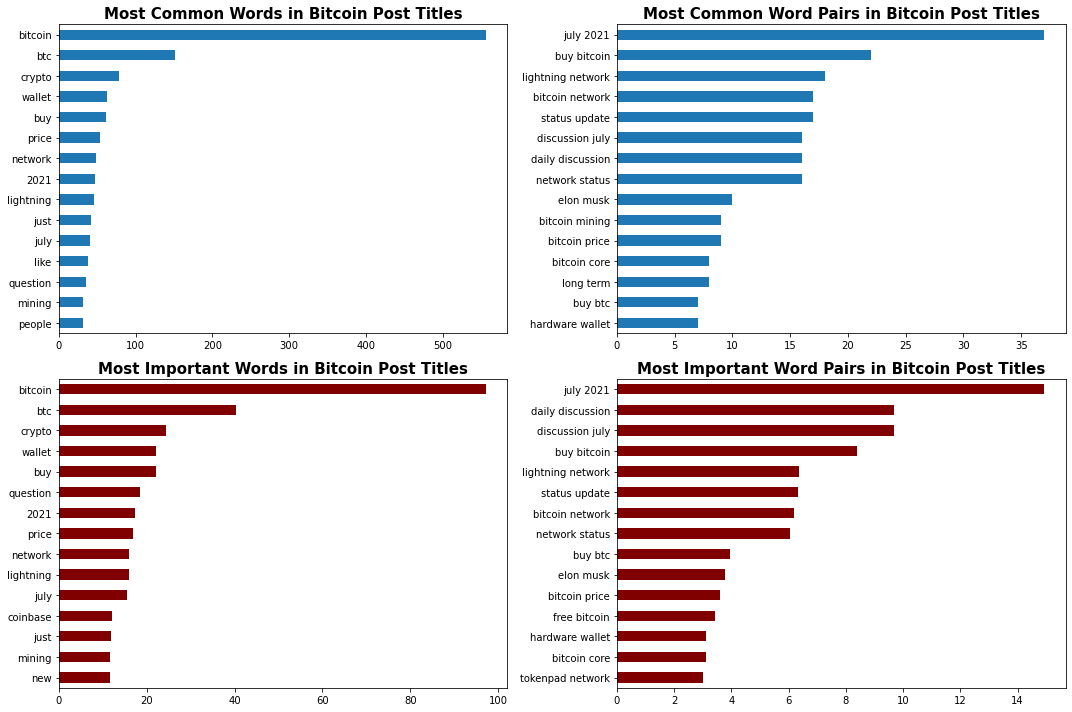

In [83]:
# visualise the 15 most common/most important words/word pairs in bitcoin post title
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

btc_post_title_cvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[0, 0])
ax[0, 0].set_title('Most Common Words in Bitcoin Post Titles', fontweight='bold', fontsize=15)
ax[0, 0].invert_yaxis()

btc_post_title_cvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[0, 1])
ax[0, 1].set_title('Most Common Word Pairs in Bitcoin Post Titles', fontweight='bold', fontsize=15)
ax[0, 1].invert_yaxis()

btc_post_title_tvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[1, 0], color='maroon')
ax[1, 0].set_title('Most Important Words in Bitcoin Post Titles', fontweight='bold', fontsize=15)
ax[1, 0].invert_yaxis()

btc_post_title_tvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[1, 1], color='maroon')
ax[1, 1].set_title('Most Important Word Pairs in Bitcoin Post Titles', fontweight='bold', fontsize=15)
ax[1, 1].invert_yaxis()

plt.tight_layout();

**Interpretation:** Some words which are both common and important in bitcoin post titles (excluding 'bitcoin' and 'btc') include 'crypto' and 'wallet'. Some word pairs which are both common and important in bitcoin post titles include 'lightning network' and 'elon musk'.

In [84]:
# find the 15 most common words in post content with count vectorization
cvec_uni = CountVectorizer(stop_words='english', ngram_range=(1, 1))
btc_post_content_cvec_uni = cvec_uni.fit_transform(p_btc['post_content'])

# get the shape of the sparse matrix
print(btc_post_content_cvec_uni.shape)

# convert sparse matrix into a dataframe with feature names
btc_post_content_cvec_uni_df = pd.DataFrame(btc_post_content_cvec_uni.toarray(), columns=cvec_uni.get_feature_names())

# # visualise the 15 most common words
# plt.figure(figsize=(10, 4))
# plt.title('Most Common Words in Bitcoin Post Content', fontweight='bold', fontsize=15)
# btc_post_content_cvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1557, 10860)


In [85]:
# find the 15 most common word pairs in post content with count vectorization
cvec_bi = CountVectorizer(stop_words='english', ngram_range=(2, 2))
btc_post_content_cvec_bi = cvec_bi.fit_transform(p_btc['post_content'])

# get the shape of the sparse matrix
print(btc_post_content_cvec_bi.shape)

# convert sparse matrix into a dataframe with feature names
btc_post_content_cvec_bi_df = pd.DataFrame(btc_post_content_cvec_bi.toarray(), columns=cvec_bi.get_feature_names())

# # visualise the 15 most common word pairs
# plt.figure(figsize=(10, 4))
# plt.title('Most Common Word Pairs in Bitcoin Post Content', fontweight='bold', fontsize=15)
# btc_post_content_cvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1557, 56612)


In [86]:
# find the 15 most important words in post content with tfidf vectorization
tvec_uni = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))
btc_post_content_tvec_uni = tvec_uni.fit_transform(p_btc['post_content'])

# get the shape of the sparse matrix
print(btc_post_content_tvec_uni.shape)

# convert sparse matrix into a dataframe with feature names
btc_post_content_tvec_uni_df = pd.DataFrame(btc_post_content_tvec_uni.toarray(), columns=tvec_uni.get_feature_names())

# # visualise the 15 most common words
# plt.figure(figsize=(10, 4))
# plt.title('Most Important Words in Bitcoin Post Content', fontweight='bold', fontsize=15)
# btc_post_content_tvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1557, 10860)


In [87]:
# find the 15 most important word pairs in post content with tfidf vectorization
tvec_bi = TfidfVectorizer(stop_words='english', ngram_range=(2, 2))
btc_post_content_tvec_bi = tvec_bi.fit_transform(p_btc['post_content'])

# get the shape of the sparse matrix
print(btc_post_content_tvec_bi.shape)

# convert sparse matrix into a dataframe with feature names
btc_post_content_tvec_bi_df = pd.DataFrame(btc_post_content_tvec_bi.toarray(), columns=tvec_bi.get_feature_names())

# # visualise the 15 most common word pairs
# plt.figure(figsize=(10, 4))
# plt.title('Most Important Word Pairs in Bitcoin Post Content', fontweight='bold', fontsize=15)
# btc_post_content_tvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1557, 56612)


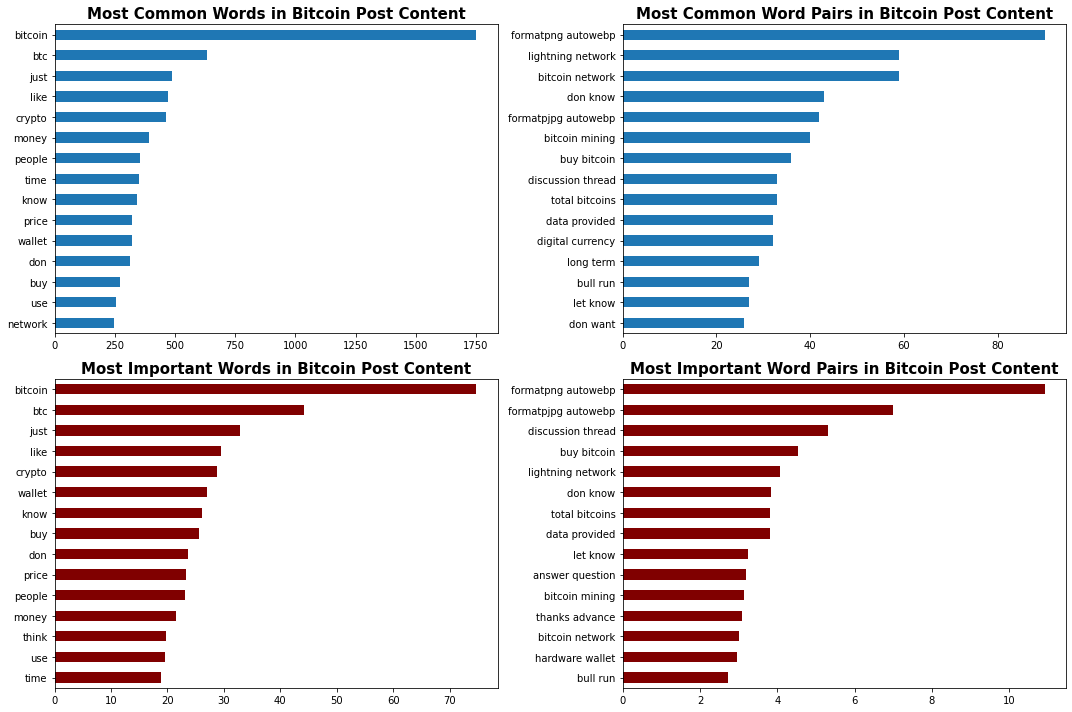

In [88]:
# visualise the 15 most common/most important words/word pairs in bitcoin post content
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

btc_post_content_cvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[0, 0])
ax[0, 0].set_title('Most Common Words in Bitcoin Post Content', fontweight='bold', fontsize=15)
ax[0, 0].invert_yaxis()

btc_post_content_cvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[0, 1])
ax[0, 1].set_title('Most Common Word Pairs in Bitcoin Post Content', fontweight='bold', fontsize=15)
ax[0, 1].invert_yaxis()

btc_post_content_tvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[1, 0], color='maroon')
ax[1, 0].set_title('Most Important Words in Bitcoin Post Content', fontweight='bold', fontsize=15)
ax[1, 0].invert_yaxis()

btc_post_content_tvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[1, 1], color='maroon')
ax[1, 1].set_title('Most Important Word Pairs in Bitcoin Post Content', fontweight='bold', fontsize=15)
ax[1, 1].invert_yaxis()

plt.tight_layout();

**Interpretation:** Some words which are both common and important in bitcoin post content (excluding 'bitcoin' and 'btc') include 'crypto' and 'wallet'. Some word pairs which are both common and important in bitcoin post content include 'lightning network' and 'bitcoin mining'.

#### Visualise Attributes Of Post Title & Post Content For Ethereum

In [89]:
# find the 15 most common words in post title with count vectorization
cvec_uni = CountVectorizer(stop_words='english', ngram_range=(1, 1))
eth_post_title_cvec_uni = cvec_uni.fit_transform(p_eth['post_title'])

# get the shape of the sparse matrix
print(eth_post_title_cvec_uni.shape)

# convert sparse matrix into a dataframe with feature names
eth_post_title_cvec_uni_df = pd.DataFrame(eth_post_title_cvec_uni.toarray(), columns=cvec_uni.get_feature_names())

# # visualise the 15 most common words
# plt.figure(figsize=(10, 4))
# plt.title('Most Common Words in Ethereum Post Titles', fontweight='bold', fontsize=15)
# eth_post_title_cvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1150, 2144)


In [90]:
# find the 15 most common word pairs in post title with count vectorization
cvec_bi = CountVectorizer(stop_words='english', ngram_range=(2, 2))
eth_post_title_cvec_bi = cvec_bi.fit_transform(p_eth['post_title'])

# get the shape of the sparse matrix
print(eth_post_title_cvec_bi.shape)

# convert sparse matrix into a dataframe with feature names
eth_post_title_cvec_bi_df = pd.DataFrame(eth_post_title_cvec_bi.toarray(), columns=cvec_bi.get_feature_names())

# # visualise the 15 most common word pairs
# plt.figure(figsize=(10, 4))
# plt.title('Most Common Word Pairs in Ethereum Post Titles', fontweight='bold', fontsize=15)
# eth_post_title_cvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1150, 3787)


In [91]:
# find the 15 most important words in post title with tfidf vectorization
tvec_uni = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))
eth_post_title_tvec_uni = tvec_uni.fit_transform(p_eth['post_title'])

# get the shape of the sparse matrix
print(eth_post_title_tvec_uni.shape)

# convert sparse matrix into a dataframe with feature names
eth_post_title_tvec_uni_df = pd.DataFrame(eth_post_title_tvec_uni.toarray(), columns=tvec_uni.get_feature_names())

# # visualise the 15 most common words
# plt.figure(figsize=(10, 4))
# plt.title('Most Important Words in Ethereum Post Titles', fontweight='bold', fontsize=15)
# eth_post_title_tvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1150, 2144)


In [92]:
# find the 15 most important word pairs in post title with tfidf vectorization
tvec_bi = TfidfVectorizer(stop_words='english', ngram_range=(2, 2))
eth_post_title_tvec_bi = tvec_bi.fit_transform(p_eth['post_title'])

# get the shape of the sparse matrix
print(eth_post_title_tvec_bi.shape)

# convert sparse matrix into a dataframe with feature names
eth_post_title_tvec_bi_df = pd.DataFrame(eth_post_title_tvec_bi.toarray(), columns=tvec_bi.get_feature_names())

# # visualise the 15 most common word pairs
# plt.figure(figsize=(10, 4))
# plt.title('Most Important Word Pairs in Ethereum Post Titles', fontweight='bold', fontsize=15)
# eth_post_title_tvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1150, 3787)


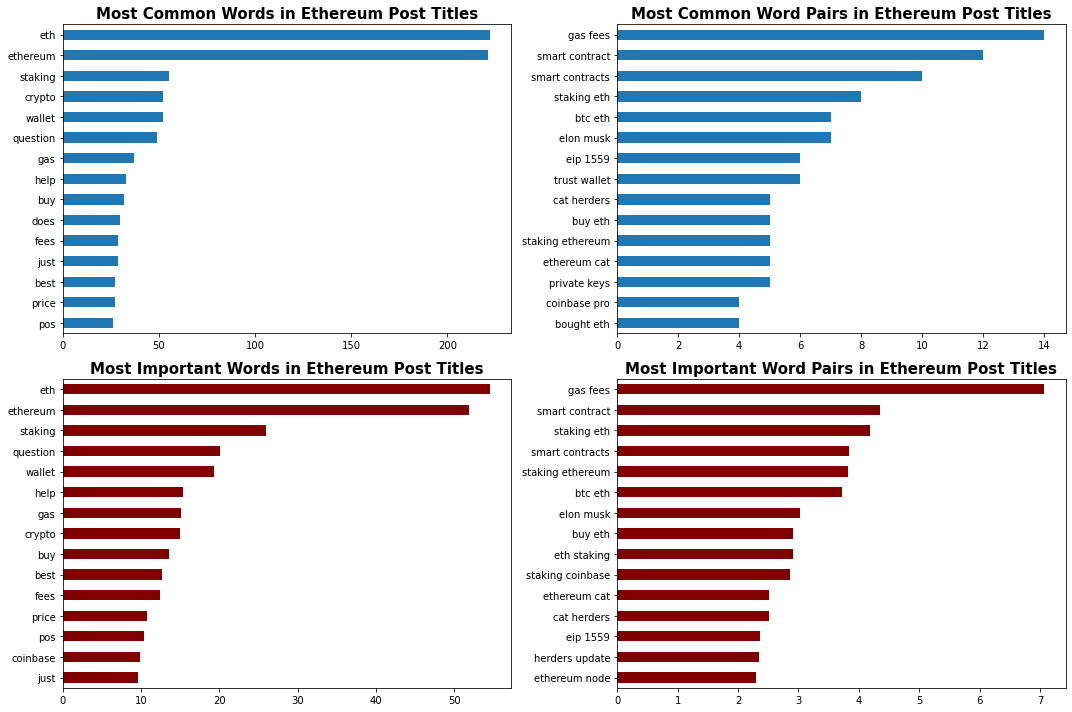

In [93]:
# visualise the 15 most common/most important words/word pairs in ethereum post title
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

eth_post_title_cvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[0, 0])
ax[0, 0].set_title('Most Common Words in Ethereum Post Titles', fontweight='bold', fontsize=15)
ax[0, 0].invert_yaxis()

eth_post_title_cvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[0, 1])
ax[0, 1].set_title('Most Common Word Pairs in Ethereum Post Titles', fontweight='bold', fontsize=15)
ax[0, 1].invert_yaxis()

eth_post_title_tvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[1, 0], color='maroon')
ax[1, 0].set_title('Most Important Words in Ethereum Post Titles', fontweight='bold', fontsize=15)
ax[1, 0].invert_yaxis()

eth_post_title_tvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[1, 1], color='maroon')
ax[1, 1].set_title('Most Important Word Pairs in Ethereum Post Titles', fontweight='bold', fontsize=15)
ax[1, 1].invert_yaxis()

plt.tight_layout();

**Interpretation:** Some words which are both common and important in ethereum post titles (excluding 'ethereum' and 'eth') include 'staking' and 'wallet'. Some word pairs which are both common and important in ethereum post titles include 'gas fees' and 'smart contracts'.

In [94]:
# find the 15 most common words in post content with count vectorization
cvec_uni = CountVectorizer(stop_words='english', ngram_range=(1, 1))
eth_post_content_cvec_uni = cvec_uni.fit_transform(p_eth['post_content'])

# get the shape of the sparse matrix
print(eth_post_content_cvec_uni.shape)

# convert sparse matrix into a dataframe with feature names
eth_post_content_cvec_uni_df = pd.DataFrame(eth_post_content_cvec_uni.toarray(), columns=cvec_uni.get_feature_names())

# # visualise the 15 most common words
# plt.figure(figsize=(10, 4))
# plt.title('Most Common Words in Ethereum Post Content', fontweight='bold', fontsize=15)
# eth_post_content_cvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1150, 9054)


In [95]:
# find the 15 most common word pairs in post content with count vectorization
cvec_bi = CountVectorizer(stop_words='english', ngram_range=(2, 2))
eth_post_content_cvec_bi = cvec_bi.fit_transform(p_eth['post_content'])

# get the shape of the sparse matrix
print(eth_post_content_cvec_bi.shape)

# convert sparse matrix into a dataframe with feature names
eth_post_content_cvec_bi_df = pd.DataFrame(eth_post_content_cvec_bi.toarray(), columns=cvec_bi.get_feature_names())

# # visualise the 15 most common word pairs
# plt.figure(figsize=(10, 4))
# plt.title('Most Common Word Pairs in Ethereum Post Content', fontweight='bold', fontsize=15)
# eth_post_content_cvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1150, 44706)


In [96]:
# find the 15 most important words in post content with tfidf vectorization
tvec_uni = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))
eth_post_content_tvec_uni = tvec_uni.fit_transform(p_eth['post_content'])

# get the shape of the sparse matrix
print(eth_post_content_tvec_uni.shape)

# convert sparse matrix into a dataframe with feature names
eth_post_content_tvec_uni_df = pd.DataFrame(eth_post_content_tvec_uni.toarray(), columns=tvec_uni.get_feature_names())

# # visualise the 15 most common words
# plt.figure(figsize=(10, 4))
# plt.title('Most Important Words in Ethereum Post Content', fontweight='bold', fontsize=15)
# eth_post_content_tvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1150, 9054)


In [97]:
# find the 15 most important word pairs in post content with tfidf vectorization
tvec_bi = TfidfVectorizer(stop_words='english', ngram_range=(2, 2))
eth_post_content_tvec_bi = tvec_bi.fit_transform(p_eth['post_content'])

# get the shape of the sparse matrix
print(eth_post_content_tvec_bi.shape)

# convert sparse matrix into a dataframe with feature names
eth_post_content_tvec_bi_df = pd.DataFrame(eth_post_content_tvec_bi.toarray(), columns=tvec_bi.get_feature_names())

# # visualise the 15 most common word pairs
# plt.figure(figsize=(10, 4))
# plt.title('Most Important Word Pairs in Ethereum Post Content', fontweight='bold', fontsize=15)
# eth_post_content_tvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
# plt.gca().invert_yaxis();

(1150, 44706)


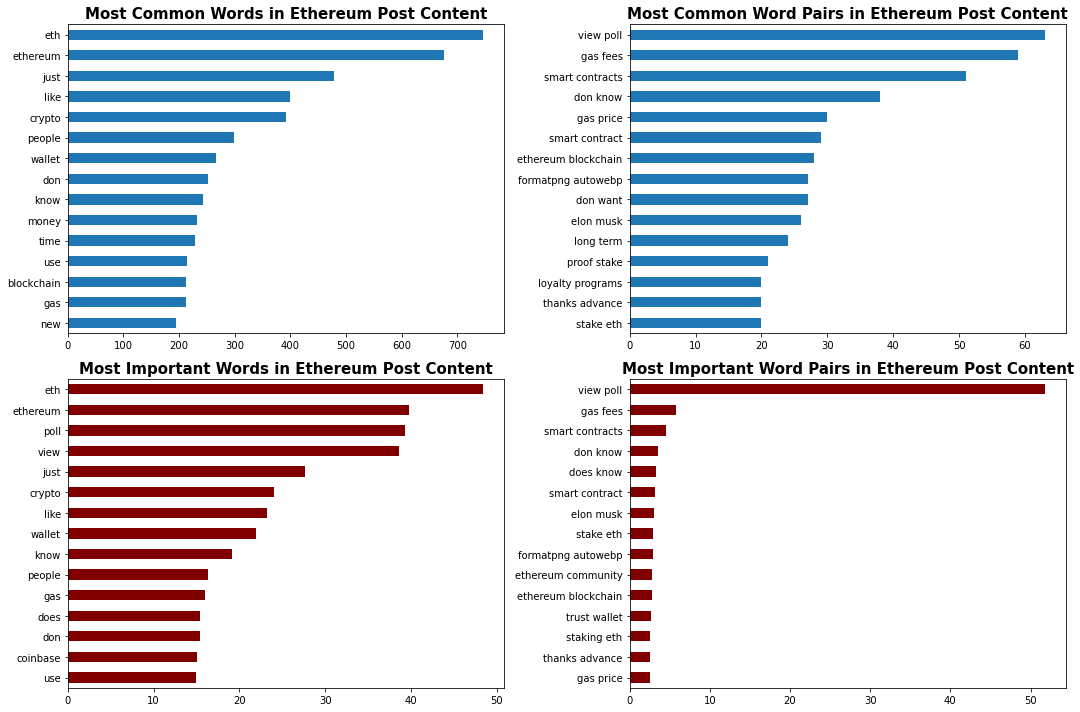

In [98]:
# visualise the 15 most common/most important words/word pairs in ethereum post content
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

eth_post_content_cvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[0, 0])
ax[0, 0].set_title('Most Common Words in Ethereum Post Content', fontweight='bold', fontsize=15)
ax[0, 0].invert_yaxis()

eth_post_content_cvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[0, 1])
ax[0, 1].set_title('Most Common Word Pairs in Ethereum Post Content', fontweight='bold', fontsize=15)
ax[0, 1].invert_yaxis()

eth_post_content_tvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[1, 0], color='maroon')
ax[1, 0].set_title('Most Important Words in Ethereum Post Content', fontweight='bold', fontsize=15)
ax[1, 0].invert_yaxis()

eth_post_content_tvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[1, 1], color='maroon')
ax[1, 1].set_title('Most Important Word Pairs in Ethereum Post Content', fontweight='bold', fontsize=15)
ax[1, 1].invert_yaxis()

plt.tight_layout();

**Interpretation:** Some words which are both common and important in ethereum post content (excluding 'ethereum' and 'eth') include 'crypto' and 'wallet'. Some word pairs which are both common and important in ethereum post content include 'gas fees' and 'smart contracts'.

#### Visualise Attributes Of Post Title & Post Content For Bitcoin & Ethereum

In [99]:
# let us remove some outliers to help with visualisations
p_btc = p_btc[p_btc['post_content_clength'] < 10000]
p_eth = p_eth[p_eth['post_content_clength'] < 10000]
p_btc = p_btc[p_btc['post_content_wcount'] < 1000]
p_eth = p_eth[p_eth['post_content_wcount'] < 1000]

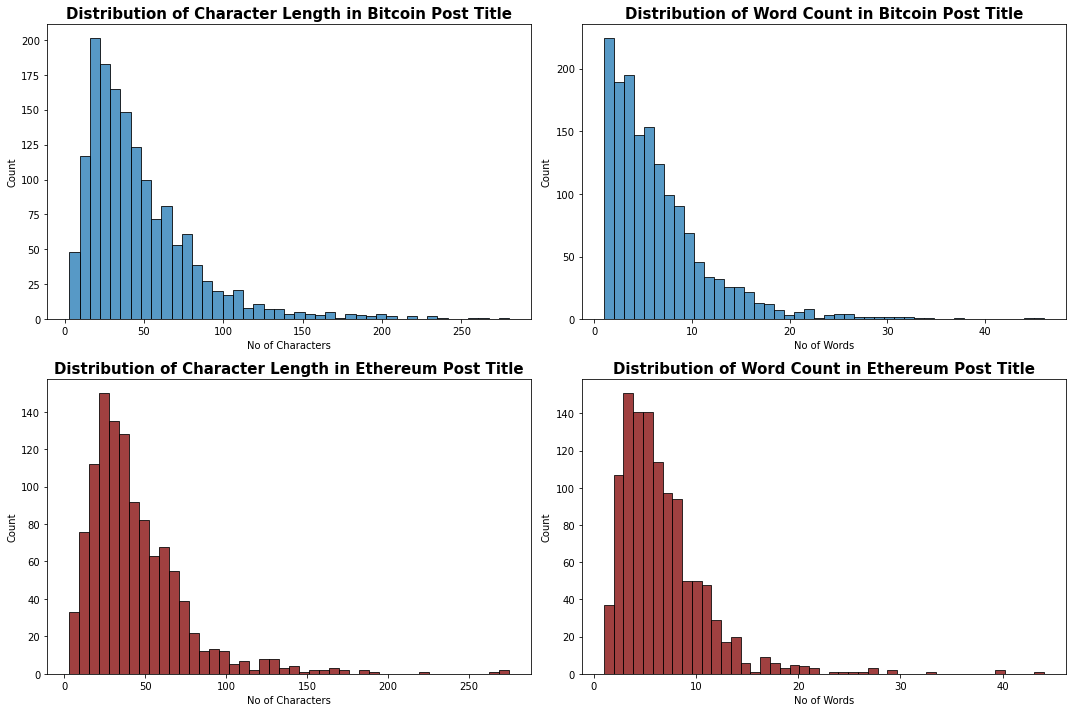

In [100]:
# visualise histogram plots of character length/word count for bitcoin/ethereum post title
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=p_btc, x='post_title_clength', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Character Length in Bitcoin Post Title', fontweight='bold', fontsize=15)
ax[0, 0].set_xlabel('No of Characters')

sns.histplot(data=p_btc, x='post_title_wcount', ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Word Count in Bitcoin Post Title', fontweight='bold', fontsize=15)
ax[0, 1].set_xlabel('No of Words')

sns.histplot(data=p_eth, x='post_title_clength', ax=ax[1, 0], color='maroon')
ax[1, 0].set_title('Distribution of Character Length in Ethereum Post Title', fontweight='bold', fontsize=15)
ax[1, 0].set_xlabel('No of Characters')

sns.histplot(data=p_eth, x='post_title_wcount', ax=ax[1, 1], color='maroon')
ax[1, 1].set_title('Distribution of Word Count in Ethereum Post Title', fontweight='bold', fontsize=15)
ax[1, 1].set_xlabel('No of Words')

plt.tight_layout();

**Interpretation:** The distributions of character length and word count in bitcoin and ethereum post title are all similar in that they have a positive skew with a long right tail, suggesting that most of the observations are clustered to the left and there are a handful of large observations to the right.

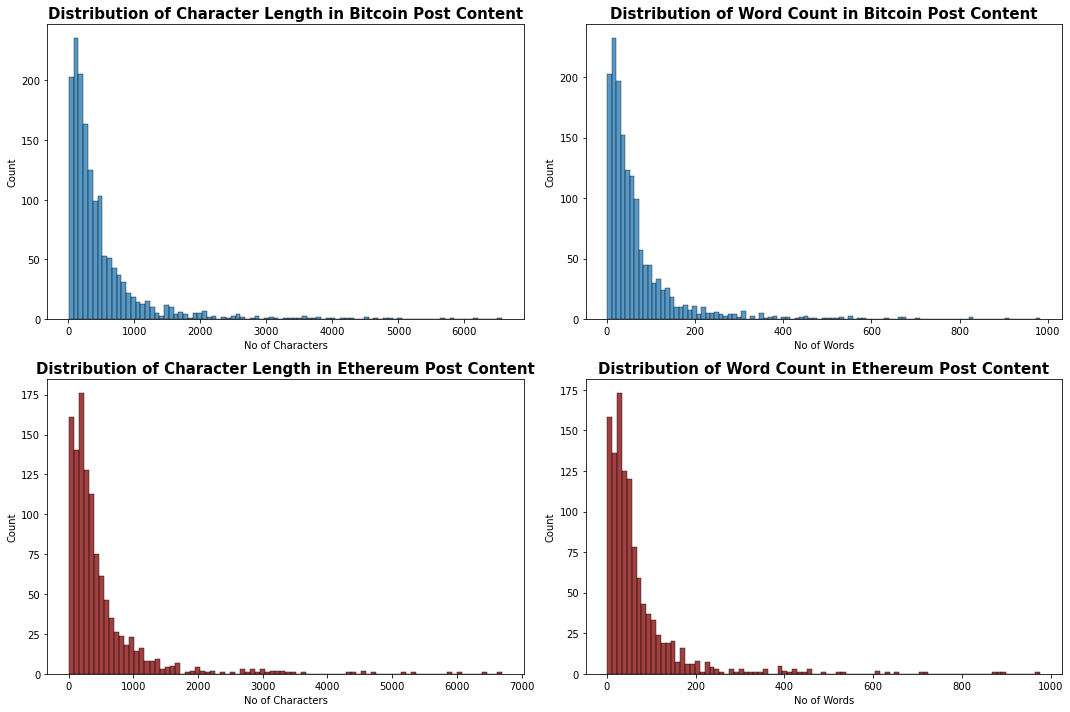

In [101]:
# visualise histogram plots of character length/word count for bitcoin/ethereum post content
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=p_btc, x='post_content_clength', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Character Length in Bitcoin Post Content', fontweight='bold', fontsize=15)
ax[0, 0].set_xlabel('No of Characters')

sns.histplot(data=p_btc, x='post_content_wcount', ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Word Count in Bitcoin Post Content', fontweight='bold', fontsize=15)
ax[0, 1].set_xlabel('No of Words')

sns.histplot(data=p_eth, x='post_content_clength', ax=ax[1, 0], color='maroon')
ax[1, 0].set_title('Distribution of Character Length in Ethereum Post Content', fontweight='bold', fontsize=15)
ax[1, 0].set_xlabel('No of Characters')

sns.histplot(data=p_eth, x='post_content_wcount', ax=ax[1, 1], color='maroon')
ax[1, 1].set_title('Distribution of Word Count in Ethereum Post Content', fontweight='bold', fontsize=15)
ax[1, 1].set_xlabel('No of Words')

plt.tight_layout();

**Interpretation:** The distributions of character length and word count in bitcoin and ethereum post content are all similar in that they have a positive skew with a long right tail, suggesting that most of the observations are clustered to the left and there are a handful of large observations to the right.

#### Visualise Attributes Of Post Title & Post Content Combined For Bitcoin & Ethereum

In [102]:
# concatenate bitcoin dataframe and ethereum dataframe
df = pd.concat([p_btc, p_eth])
df.reset_index(drop=True, inplace=True)

# combine post title column and post content column into a new column
df['title_content'] = df['post_title'] + ' ' + df['post_content']
df['title_content_clength'] = df['title_content'].apply(len)
df['title_content_wcount'] = df['title_content'].apply(lambda x: len(x.split()))

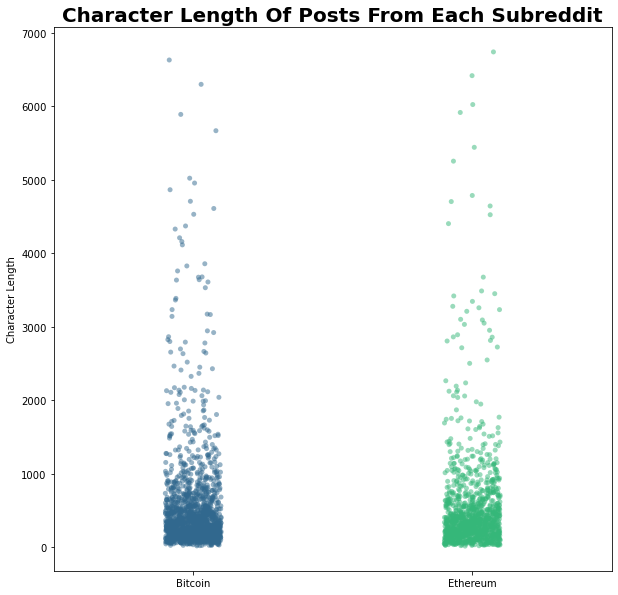

In [103]:
# visualise stripplot of character length for bitcoin/ethereum post combined
plt.figure(figsize=(10, 10))
sns.stripplot(data=df, x='subreddit', y='title_content_clength', jitter=True, alpha=0.5, palette='viridis')
plt.title('Character Length Of Posts From Each Subreddit', fontweight='bold', fontsize=20)
plt.ylabel('Character Length')
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Bitcoin', 'Ethereum']);

**Interpretation:** The character lengths of posts from both subreddits are quite similar in scatter save for the fact that bitcoin tends to have more posts in the character length range of 2000 to 5000 than ethereum.

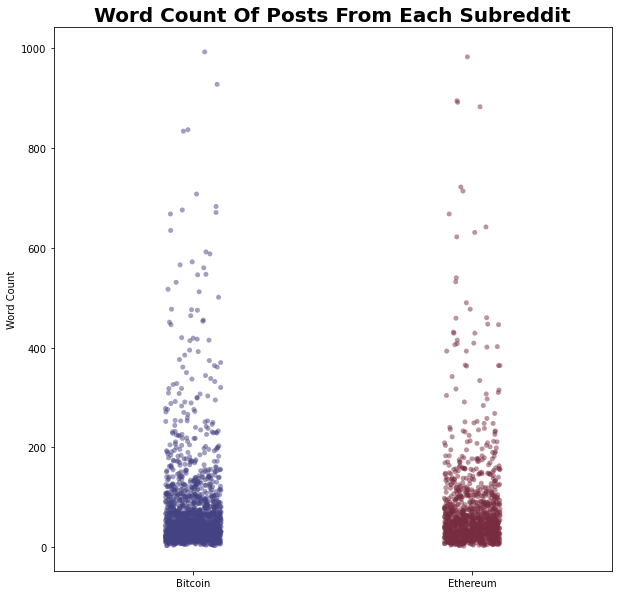

In [104]:
# visualise stripplot of word count for bitcoin/ethereum post combined
plt.figure(figsize=(10, 10))
sns.stripplot(data=df, x='subreddit', y='title_content_wcount', jitter=True, alpha=0.5, palette='icefire')
plt.title('Word Count Of Posts From Each Subreddit', fontweight='bold', fontsize=20)
plt.ylabel('Word Count')
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Bitcoin', 'Ethereum']);

**Interpretation:** The word counts of posts from both subreddits are quite similar in scatter save for the fact that bitcoin tends to have more posts in the word count range of 400 to 800 than ethereum.

### Target Column Visualisations

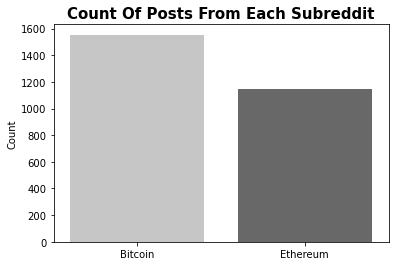

In [105]:
# visualise count plot of target column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='subreddit', palette='Greys')
plt.title('Count Of Posts From Each Subreddit', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Bitcoin', 'Ethereum']);

**Interpretation:** The binary classes in the target column are fairly well-balanced. There is no concern of under- or over-representation by any one class.